In [3]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import requests
import io
from imblearn.over_sampling import SMOTE

In [4]:
!gdown 1_QZbRaEzVyjOh7189chQlLmmuji7_fH-

Downloading...
From: https://drive.google.com/uc?id=1_QZbRaEzVyjOh7189chQlLmmuji7_fH-
To: /Users/manishdiddi/Documents/Scaler-AI-ML/Machine Learning/Supervised/loan_approval_dataset.csv
100%|████████████████████████████████████████| 384k/384k [00:00<00:00, 2.39MB/s]


In [5]:
data = pd.read_csv("loan_approval_dataset.csv")


In [6]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [7]:
cat_cols = data.select_dtypes(include='object').columns

In [8]:
cat_cols

Index([' education', ' self_employed', ' loan_status'], dtype='object')

In [9]:
data.columns = data.columns.str.strip()


In [10]:
data = data.drop("loan_id", axis=1)

In [11]:
missing_values = data.isna().sum()

In [12]:
missing_values

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [13]:
# Calculate the count of each class label in the "loan_status" column
class_counts = data["loan_status"].value_counts()

# Print the class distribution
print("Class Distribution:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")

Class Distribution:
Class  Approved: 2656 samples
Class  Rejected: 1613 samples


In [14]:
# Replace values in the "education" column with numerical values
data["education"] = data["education"].replace({
    " Graduate": 1,
    " Not Graduate": 0
})

# Replace values in the "self_employed" column with numerical values
data["self_employed"] = data["self_employed"].replace({
    " No": 0,
    " Yes": 1
})

# Replace values in the "loan_status" column with numerical values
data["loan_status"] = data["loan_status"].replace({
    " Approved": 1,
    " Rejected": 0
})

/var/folders/rt/mvnm7dxx3fq528n9njvz70wc0000gn/T/ipykernel_41613/312589744.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["education"] = data["education"].replace({
/var/folders/rt/mvnm7dxx3fq528n9njvz70wc0000gn/T/ipykernel_41613/312589744.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["self_employed"] = data["self_employed"].replace({
/var/folders/rt/mvnm7dxx3fq528n9njvz70wc0000gn/T/ipykernel_41613/312589744.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future v

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


In [16]:
def classify_columns(data):
    # Initialize lists for categorical and numerical columns
    cat_col = []
    num_col = []

    # Iterate through columns in the DataFrame
    for column in data.columns:
        # Count the number of unique values in the column
        unique_values = data[column].nunique()

        # If there are fewer than 3 unique values, consider it a categorical column
        if unique_values < 3:
            cat_col.append(column)
        # Otherwise, consider it a numerical column
        else:
            num_col.append(column)

    # Return the lists of categorical and numerical columns
    return cat_col, num_col

In [17]:
cat_col, num_col = classify_columns(data)

In [18]:
cat_col

['education', 'self_employed', 'loan_status']

In [19]:
def heat_map(data):
    # Create a figure for the heatmap
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

    # Calculate the correlation between "loan_status" and all other columns, sort by correlation
    correlations = data.corr()["loan_status"].to_frame().sort_values(
        by="loan_status",
        ascending=False
    )

    # Generate the heatmap with annotations using the "Blues" colormap
    sns.heatmap(correlations, annot=True, cmap="Blues")

    # Set the title for the heatmap
    plt.title("Correlation Heatmap")

    # Show the plot
    plt.show()

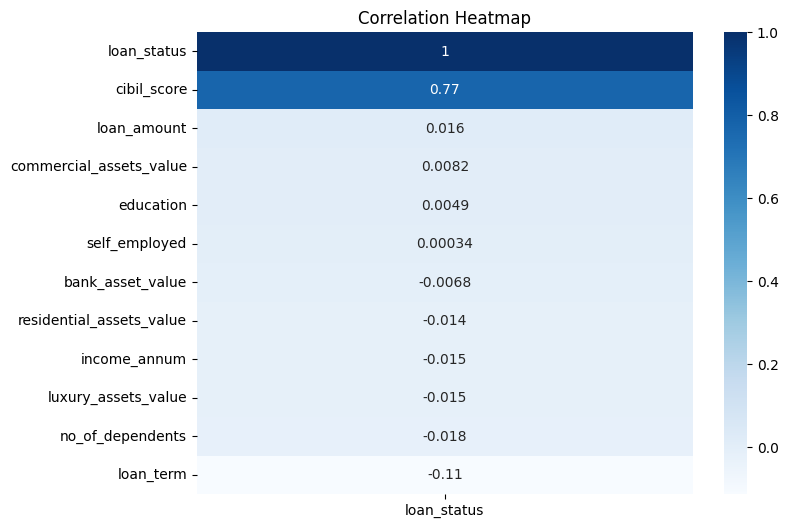

In [20]:
heat_map(data)

In [21]:
def visualise_cat(cat_col):
    # Determine the number of columns and rows for subplots
    num_cols = 3  # Number of columns in each row
    num_rows = (len(cat_col) + 1) // num_cols  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))  # Adjust the figure size as needed
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Iterate through categorical columns and create bar plots
    for i, column in enumerate(cat_col):
        ax = axes[i]
        sns.countplot(data=data, x=column, ax=ax, palette="Blues")
        ax.set_title(f'Bar Plot of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

    # Adjust the layout and display the plots
    plt.tight_layout()
    plt.show()

/var/folders/rt/mvnm7dxx3fq528n9njvz70wc0000gn/T/ipykernel_41613/2588634470.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, ax=ax, palette="Blues")
/var/folders/rt/mvnm7dxx3fq528n9njvz70wc0000gn/T/ipykernel_41613/2588634470.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, ax=ax, palette="Blues")
/var/folders/rt/mvnm7dxx3fq528n9njvz70wc0000gn/T/ipykernel_41613/2588634470.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, ax=ax, palette="Blues")


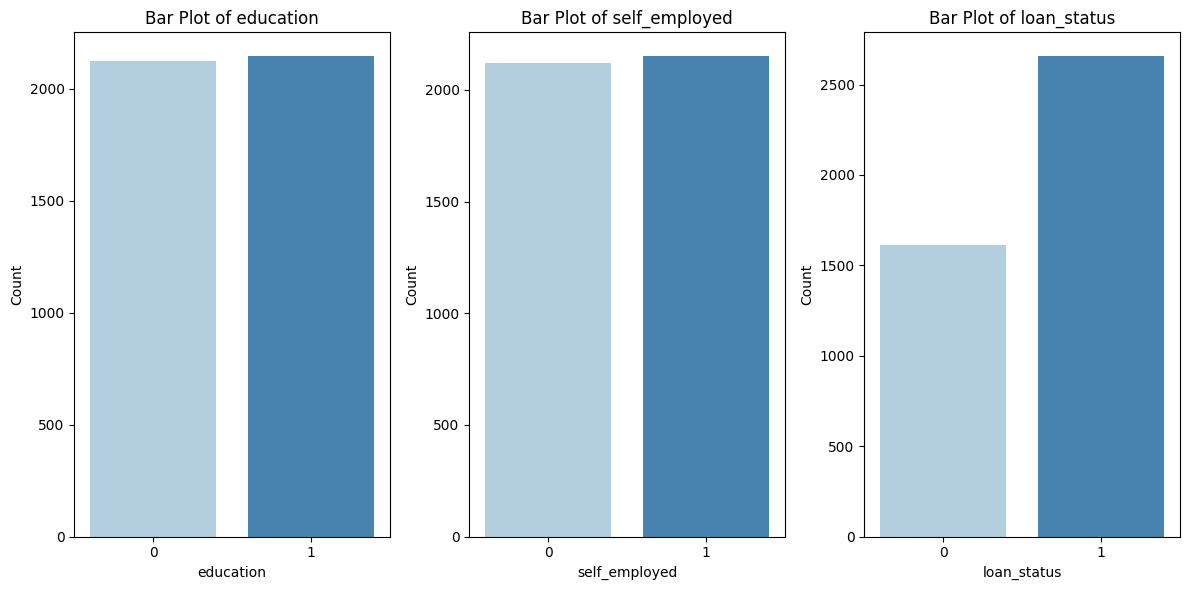

In [22]:
visualise_cat(cat_col)

In [23]:
def visualise_num(num_col, data):
    # Determine the number of columns and rows for subplots
    num_cols = 3  # Number of columns in each row
    num_rows = (len(num_col) + 1) // num_cols  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))  # Adjust the figure size as needed
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Iterate through numerical columns and create histograms
    for i, column in enumerate(num_col):
        ax = axes[i]
        sns.histplot(data=data, x=column, bins=10, kde=True, ax=ax, edgecolor='black')
        ax.set_title(f'Histogram of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

    # Adjust the layout and display the plots
    plt.tight_layout()
    plt.show()

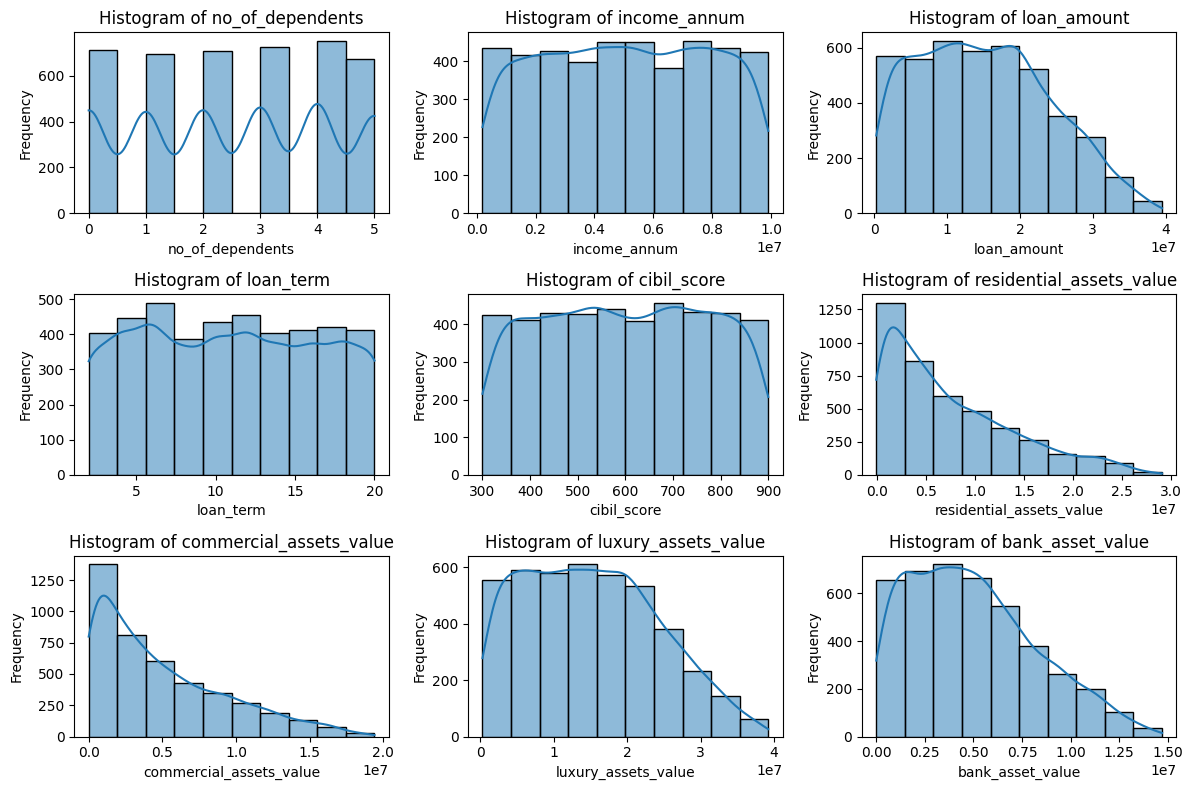

In [24]:
visualise_num(num_col, data)

In [25]:
def remove_outliers(data, cat_col, threshold=3):
    # Calculate Z-scores for numerical columns (excluding categorical columns)
    z_scores = stats.zscore(data.drop(cat_col, axis=1))

    # Identify outliers by comparing absolute Z-scores to the threshold
    outliers = np.abs(z_scores) > threshold

    # Find rows containing outliers in any numerical column
    filtered_rows = np.any(outliers, axis=1)

    # Remove rows with outliers and reset the index of the cleaned data
    cleaned_data = data[~filtered_rows].reset_index(drop=True)

    return cleaned_data

In [26]:
cleaned_data = remove_outliers(data, cat_col, threshold=3)

In [27]:
def scale_data(data, cat_col, num_col):
    # Separate numerical and categorical columns
    num_data = data[num_col]
    cat_data = data[cat_col]

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Scale the numerical data and create a DataFrame with the same column names
    scaled_num_data = pd.DataFrame(scaler.fit_transform(num_data), columns=num_col)

    # Combine scaled numerical data with categorical data
    scaled_data = pd.concat([scaled_num_data, cat_data], axis=1)

    return scaled_data

In [28]:
def run_model(data, model, name):
    # Separate features (X) and target (y)
    X = data.drop("loan_status", axis=1)
    y = data["loan_status"]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    # Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training set
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Fit the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Return the model's predictions and the actual labels (y_test)
    return predictions, y_test

### Model Metrics Summary

Below is a summary of key performance metrics for each model:

| Model                  | Accuracy | Precision | Recall | F1 Score |
|------------------------|----------|-----------|--------|----------|
| Decision Tree          | 0.9823   | 0.9904    | 0.9811 | 0.9857   |
| Random Forest          | 0.9823   | 0.9942    | 0.9773 | 0.9857   |
| Gradient Boosting      | 0.9811   | 0.9961    | 0.9735 | 0.9847   |
| AdaBoost               | 0.9670   | 0.9921    | 0.9545 | 0.9730   |
| Gaussian Naive Bayes   | 0.9446   | 0.9918    | 0.9186 | 0.9538   |
| Support Vector Machine | 0.9410   | 0.9858    | 0.9186 | 0.9510   |
| Logistic Regression    | 0.9233   | 0.9658    | 0.9091 | 0.9366   |
| K-Nearest Neighbors    | 0.8974   | 0.9584    | 0.8731 | 0.9138   |

In [29]:
from sklearn.metrics import roc_curve, auc

def models(data):
    results = []  # Initialize a list to store results
    cm_data = []  # Initialize a list to store confusion matrix data
    roc_data = []  # Initialize a list to store ROC curve data
    models = {  # Dictionary of models to be evaluated
        "Logistic Regression": LogisticRegression(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Gaussian Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC()
    }

    # Iterate through the models
    for name, model in models.items():
        # Run the model and get predictions and actual labels
        predictions, y_test = run_model(data, model, name)

        # Evaluate the model and calculate metrics
        accuracy, precision, recall, f1, cm = evaluate_model(y_test, predictions)

        # Calculate ROC curve data
        fpr, tpr, _ = roc_curve(y_test, predictions)
        roc_auc = auc(fpr, tpr)

        # Store the results in a dictionary
        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })

        cm_data.append({
            "Model": name,
            "Matrix": cm
        })

        # Store ROC curve data in a dictionary
        roc_data.append({
            "Model": name,
            "FPR": fpr.tolist(),
            "TPR": tpr.tolist(),
            "AUC": roc_auc
        })

    # Create a DataFrame from the results, round the values, and sort by accuracy
    results_df = pd.DataFrame(results).round(4).sort_values(by="Accuracy", ascending=False)

    return results_df, cm_data, roc_data

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate precision
    precision = precision_score(y_true, y_pred)

    # Calculate recall
    recall = recall_score(y_true, y_pred)

    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, cm

In [31]:
def pipeline(data):
    # Step 1: Classify columns as categorical or numerical
    cat_col, num_col = classify_columns(data)

    # Step 2: Remove outliers from the dataset
    cleaned_data = remove_outliers(data, cat_col)

    # Step 3: Scale the numerical features
    scaled_data = scale_data(cleaned_data, cat_col, num_col)

    # Step 4: Evaluate model performance using different models
    performance, cm_data, roc_data = models(scaled_data)

    return performance, cm_data, roc_data

In [32]:
performance, cm_data, roc_data = pipeline(data)

/Users/manishdiddi/ml-env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [33]:
print(performance)

                    Model  Accuracy  Precision  Recall  F1 Score
6           Random Forest    0.9858     0.9962  0.9811    0.9885
5           Decision Tree    0.9835     0.9923  0.9811    0.9867
1       Gradient Boosting    0.9811     0.9961  0.9735    0.9847
2                AdaBoost    0.9670     0.9921  0.9545    0.9730
3    Gaussian Naive Bayes    0.9446     0.9918  0.9186    0.9538
7  Support Vector Machine    0.9410     0.9858  0.9186    0.9510
0     Logistic Regression    0.9233     0.9658  0.9091    0.9366
4     K-Nearest Neighbors    0.8974     0.9584  0.8731    0.9138


In [ ]:
def plot_confusion_matrix(cm, labels, model_name, ax):
    # Create an image of the confusion matrix
    im = ax.imshow(cm, interpolation='nearest')

    # Add a colorbar to the plot
    ax.figure.colorbar(im, ax=ax)

    # Set axis labels and title
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           title=f'Confusion Matrix for {model_name}',
           ylabel='True label',
           xlabel='Predicted label')

    # Add text annotations for each cell in the matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="w")

In [35]:
def plot_confusion_matrices(cm_data, columns, rows):
    # Determine the number of models and create subplots accordingly
    num_models = len(cm_data)
    fig, axes = plt.subplots(rows, columns, figsize=(15, 10))

    # Iterate through the confusion matrix data for each model
    for i, entry in enumerate(cm_data):
        model_name = entry['Model']
        cm = entry['Matrix']
        class_labels = ['Class 0', 'Class 1']  # Replace with your actual class labels
        row = i // columns
        col = i % columns
        ax = axes[row, col]
        plot_confusion_matrix(cm, class_labels, model_name, ax)

    # Turn off empty subplots
    for i in range(len(cm_data), columns * rows):
        row = i // columns
        col = i % columns
        axes[row, col].axis('off')

    # Adjust the layout and display the subplots
    plt.tight_layout()
    plt.show()

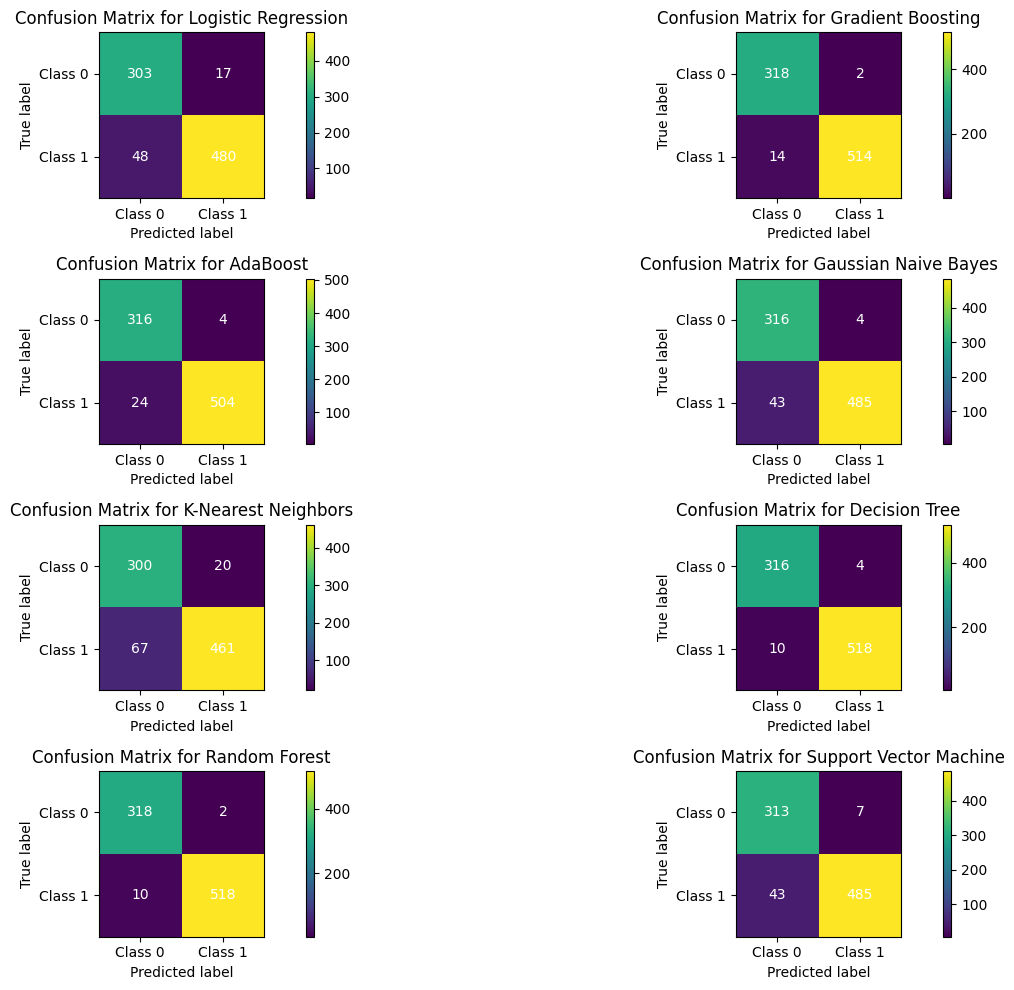

In [36]:
plot_confusion_matrices(cm_data, columns=2, rows=4)

In [37]:
def plot_roc_curve(roc_data):
    plt.figure(figsize=(8, 6))
    plt.title('Receiver Operating Characteristic (ROC) Curve')

    for model_data in roc_data:
        model_name = model_data['Model']
        fpr = model_data['FPR']
        tpr = model_data['TPR']
        auc = model_data['AUC']

        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')  # Removed color='gray'
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

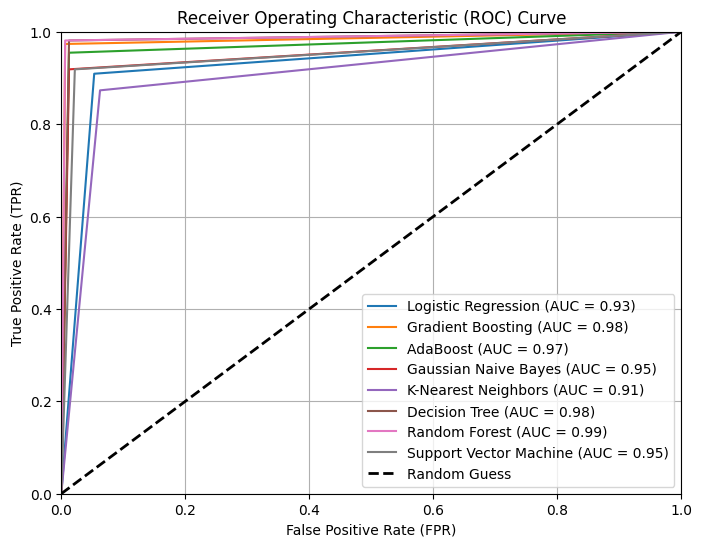

In [38]:
plot_roc_curve(roc_data)